In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [69]:
!pip list | grep py7zr

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [ ]:
!apt-get install -y p7zip-full
!7z x /kaggle/input/cifar-10/train.7z -y

In [71]:
#import py7zr

#archive = py7zr.SevenZipFile('/kaggle/input/cifar-10/train.7z', mode='r')    # .7r is a zip file 
#archive.extractall()          # Extracting all the image data 
#archive.close()

In [72]:
filenames = os.listdir('/kaggle/working/train')


In [73]:
type(filenames)

list

In [74]:
len(filenames)

50000

In [75]:
print(filenames[0:5])
print(filenames[-5:])

['43782.png', '36742.png', '39498.png', '17565.png', '23089.png']
['22007.png', '21260.png', '31140.png', '43804.png', '35688.png']


# Importing Libraries

In [76]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [77]:
labels_df=pd.read_csv('/kaggle/input/cifar-10/trainLabels.csv')

In [78]:
labels_df.shape

(50000, 2)

In [79]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [80]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [81]:
# train.7z - a folder containing the training images in png format
# test.7z - a folder containing the test images in png format
# trainLabels.csv - the training labels

# Encoding the Labels

In [82]:
labels_df['label'].value_counts()          # data is distributed

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [83]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}  # label encoding

labels = [labels_dictionary[i] for i in labels_df['label']]

In [84]:
labels[0:10]

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]

In [85]:
len(labels)

50000

In [86]:
import cv2

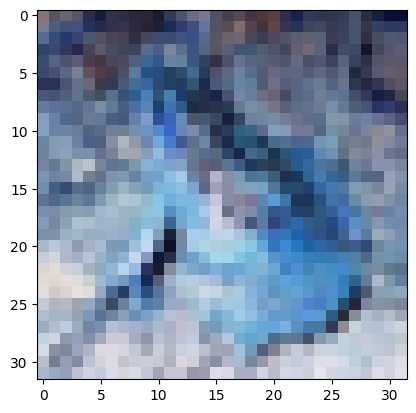

In [87]:
img = cv2.imread('train/7796.png')
plt.imshow(img)

In [88]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [89]:
id_list = list(labels_df['id'])
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [90]:
train_data_folder = '/kaggle/working/train'
data=[]
for id in id_list:
    file_path = os.path.join(train_data_folder, f'{id}.png')

    if os.path.isfile(file_path):
        image = Image.open(file_path)
        image = np.array(image)
        data.append(image)

In [91]:
data = np.array(data)

print(f"Loaded {len(data)} images with shape: {data.shape}")

Loaded 50000 images with shape: (50000, 32, 32, 3)


In [92]:
data[0].shape

(32, 32, 3)

In [93]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [94]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [95]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


# Train Test Split

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [97]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [98]:
# Normalization ( value ranges from 0-255)
X_train_scaled = X_train/255

X_test_scaled = X_test/255


In [99]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [100]:
X_train[0]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]

# Appline only ANN with 10 layers

In [101]:
import tensorflow as tf
from tensorflow import keras

In [102]:
# here we are only applying ANN
num_of_classes = 10
model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [103]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [104]:
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
  84/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.1696 - loss: 2.2863

W0000 00:00:1723727769.185661     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.2609 - loss: 2.0308 - val_acc: 0.3137 - val_loss: 1.8758
Epoch 2/10


W0000 00:00:1723727771.610346     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.3261 - loss: 1.8508 - val_acc: 0.3453 - val_loss: 1.7863
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3548 - loss: 1.7803 - val_acc: 0.3660 - val_loss: 1.7607
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3671 - loss: 1.7569 - val_acc: 0.3695 - val_loss: 1.7404
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3742 - loss: 1.7307 - val_acc: 0.3792 - val_loss: 1.7147
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3854 - loss: 1.7212 - val_acc: 0.3758 - val_loss: 1.7093
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3867 - loss: 1.7020 - val_acc: 0.3780 - val_loss: 1.7170
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3959 - loss: 1.6885 - val_acc: 0.3795 - val_loss: 1.7124
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3900 - loss: 1.6839 - val_acc: 0.4005 - val_loss: 1.6780
Epoch 10/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/s

# Using ResNET 50 as convolution Base

In [105]:
# Now we will use transfer learning 
# here we will use Resnet50 which is a pre trained model as CNN base layer

In [106]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [107]:
from tensorflow.keras.applications import ResNet50

In [108]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

#imageNet Dataset
#Size: Over 14 million images.
# Classes: 1,000 object classes (in the ILSVRC subset) and over 20,000 categories in the full dataset.
# Applications: Image classification, object detection, segmentation, and other computer vision tasks.
# Challenges: Used in the annual ImageNet Large Scale Visual Recognition Challenge (ILSVRC).

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_7[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

# Adding ANN to ResNET 50 Convolution Base

In [109]:
num_of_classes = 10

model = models.Sequential()

model.add(layers.UpSampling2D((2,2)))    # ResNET50 takes input image size as (256,256) but our image size is 32  therefore 32*2*2*2=256 
model.add(layers.UpSampling2D((2,2)))    # therefore we are upscaling in three time in order of (2,2)
model.add(layers.UpSampling2D((2,2)))

model.add(convolutional_base)                    # resNET

model.add(layers.Flatten())
model.add(layers.BatchNormalization())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))                # to avoid overfitting   # by dropout some neuron will turn off
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(num_of_classes, activation='softmax'))

In [110]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

# Comapring Validation acc and acc

In [111]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 244s 179ms/step - acc: 0.3290 - loss: 2.0320 - val_acc: 0.7837 - val_loss: 0.8375
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 237s 175ms/step - acc: 0.6657 - loss: 1.0855 - val_acc: 0.9000 - val_loss: 0.4635
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 202s 175ms/step - acc: 0.7912 - loss: 0.7895 - val_acc: 0.9250 - val_loss: 0.3587
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 202s 175ms/step - acc: 0.8570 - loss: 0.5993 - val_acc: 0.9312 - val_loss: 0.3076
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 198s 176ms/step - acc: 0.9051 - loss: 0.4643 - val_acc: 0.9330 - val_loss: 0.2614
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 198s 176ms/step - acc: 0.9347 - loss: 0.3655 - val_acc: 0.9405 - val_loss: 0.2373
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 198s 176ms/step - acc: 0.9491 - loss: 0.3007 - val_acc: 0.9450 - val_loss: 0.2213
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 202s 176ms/step - acc: 0.9651 - loss: 0.2377 - val_acc: 0.9442 - val_loss: 0.2120
Epoch 9/

In [112]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - acc: 0.9333 - loss: 0.2486
Test Accuracy = 0.9330000281333923


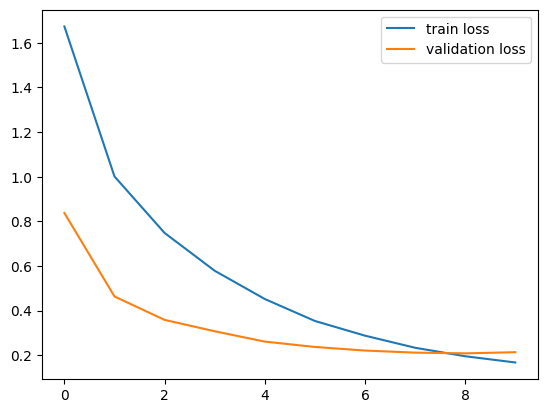

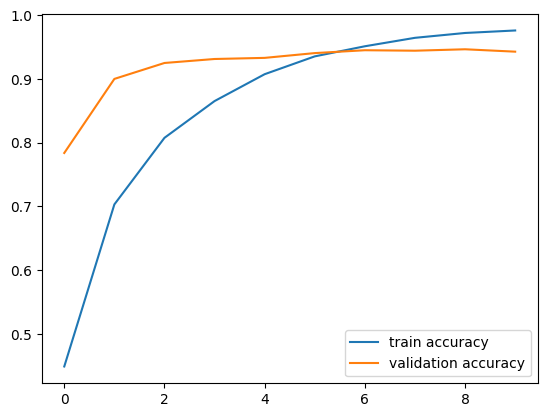

In [113]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# Test Data for Kaggle Submission

In [ ]:
!7z x /kaggle/input/cifar-10/test.7z -y

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C,Utf16=off,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /kaggle/input/cifar-10                                1 file, 639374249 bytes (610 MiB)

Extracting archive: /kaggle/input/cifar-10/test.7z
--
Path = /kaggle/input/cifar-10/test.7z
Type = 7z
Physical Size = 639374249
Headers Size = 1721070
Method = LZMA:26
Solid = +
Blocks = 1

    
Would you like to replace the existing file:
  Path:     ./test/1.png
  Size:     2291 bytes (3 KiB)
  Modified: 2013-10-18 16:31:26
with the file from archive:
  Path:     test/1.png
  Size:     2291 bytes (3 KiB)
  Modified: 2013-10-18 16:31:26
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? 

In [ ]:
test_filenames = os.listdir('/kaggle/working/test')
test_data_folder = '/kaggle/working/test'

test_data = []
for filename in test_filenames:
    file_path = os.path.join(test_data_folder, filename)
    
    if os.path.isfile(file_path):
        image = Image.open(file_path)
        image = np.array(image)
        test_data.append(image)

test_data = np.array(test_data)

In [ ]:
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
inverse_labels_dictionary = {v: k for k, v in labels_dictionary.items()}
predicted_labels = [inverse_labels_dictionary[label] for label in predicted_labels]

In [ ]:
sub_df=pd.read_csv('//kaggle//input//cifar-10//sampleSubmission.csv')

In [ ]:
sub_df.head()

In [ ]:
# Extract test image IDs from filenames
test_ids = sub_df['id']

In [ ]:


# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': test_ids,
    'label': predicted_labels
})

# Save the submission file
submission_df.to_csv('/kaggle/working/submission.csv', index=False)